In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

/Users/carolbarroco/Documents/RecomendSisKNN/NewVenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/carolbarroco/Documents/RecomendSisKNN/NewVenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/carolbarroco/Documents/RecomendSisKNN/NewVenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/carolbarroco/Documents/RecomendSisKNN/NewVenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/carolbarroco/Documents/RecomendSi

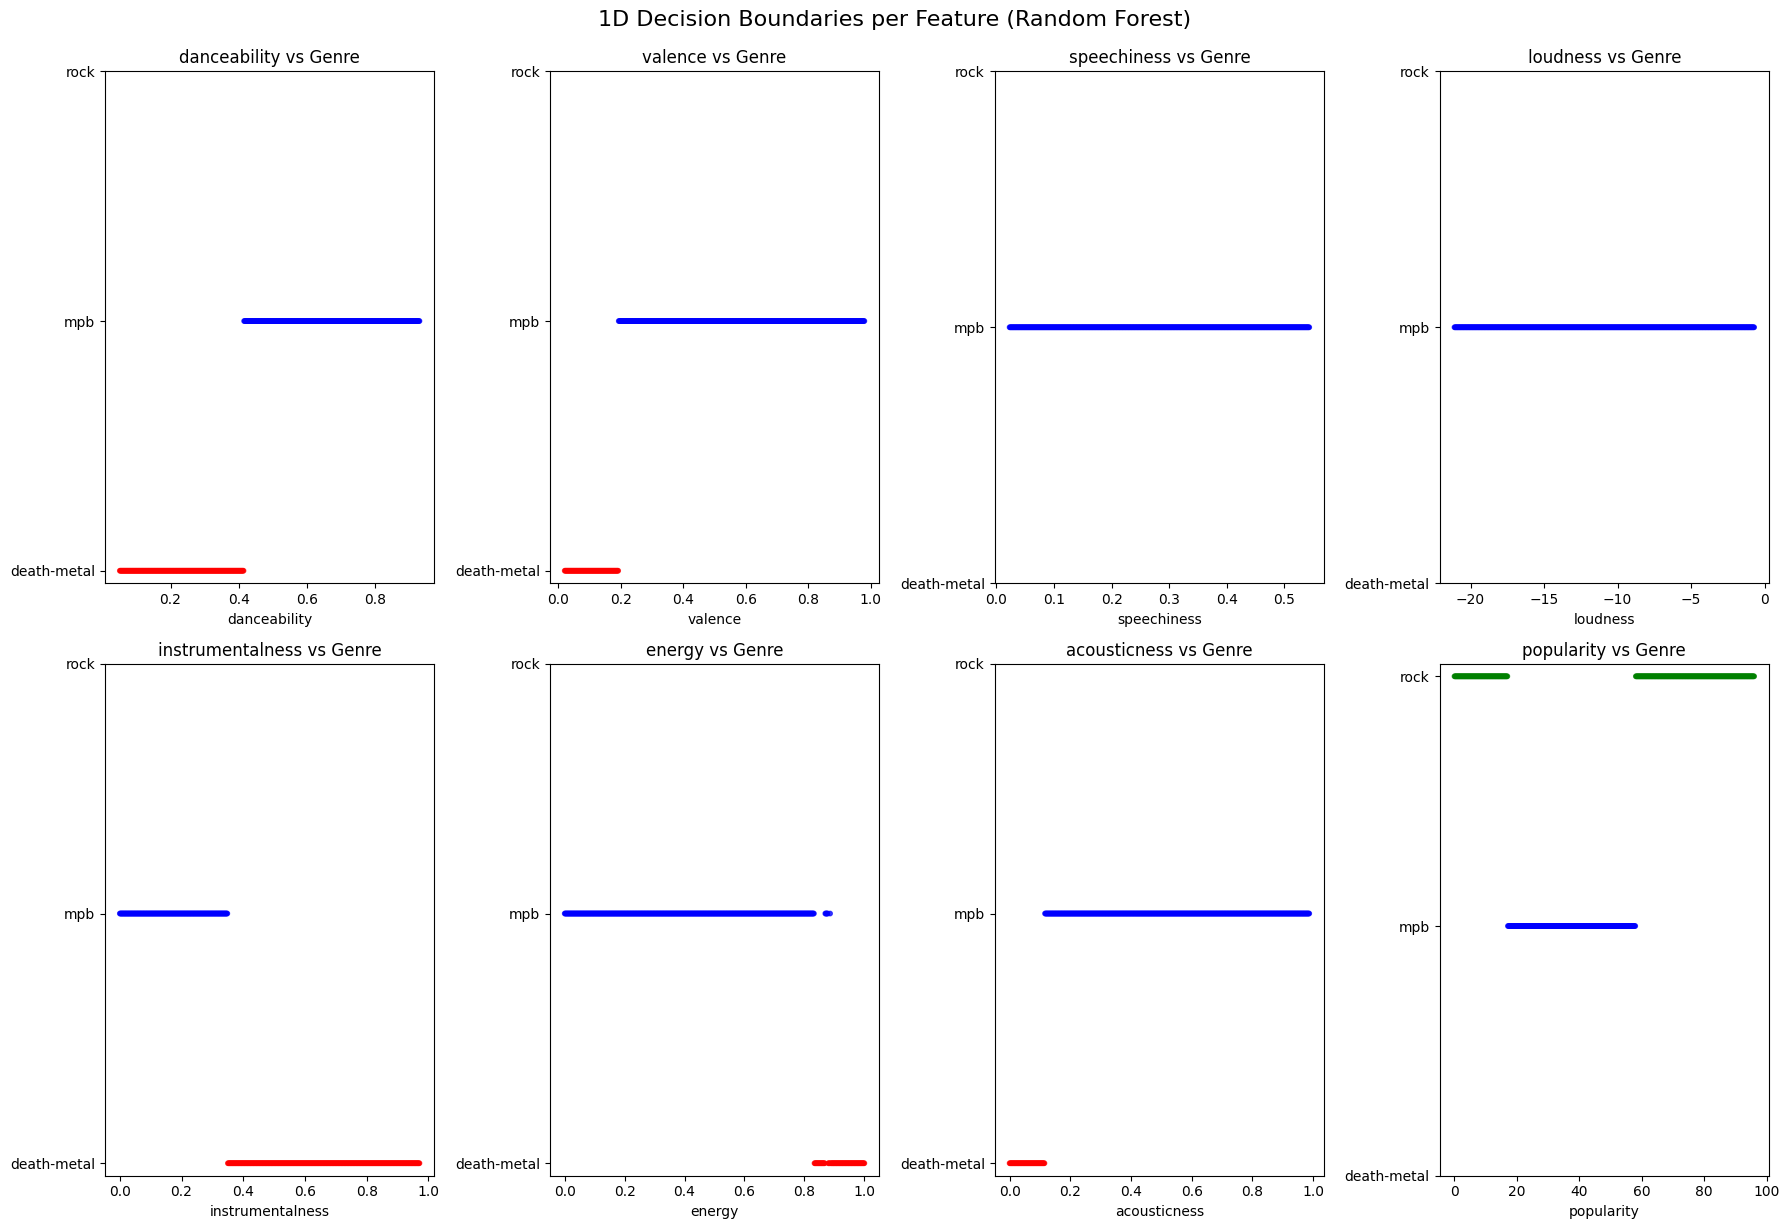

In [49]:

# Load your dataset
df = pd.read_csv("/Users/carolbarroco/Documents/RecomendSisKNN/TG2 RecommendSys/GitHub/T2-Indroducao-Ciencia-de-Dados/Data/MPBROCKMETAL_KGDataSet.csv")
# Define the features and target
features = [
    "danceability", "valence", "speechiness", "loudness",
    "instrumentalness", "energy", "acousticness", "popularity"
]
target = "track_genre"  # change this to the actual column name if different

# Encode genres to integers
le = LabelEncoder()
df[target] = le.fit_transform(df[target])

X = df[features]
y = df[target]

# Train a single Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X, y)

# Prepare plot
n_features = len(features)
cols = 4
rows = int(np.ceil(n_features / cols))
fig, axes = plt.subplots(rows, cols, figsize=(18, 12))
axes = axes.flatten()

# Define color map
colors = ['red', 'blue', 'green']
genre_names = le.classes_

# Plot each feature's decision boundary
for i, feature in enumerate(features):
    ax = axes[i]
    # Create synthetic data varying only this feature
    x_vals = np.linspace(df[feature].min(), df[feature].max(), 500)
    X_temp = np.tile(X.mean().values, (500, 1))
    X_temp[:, X.columns.get_loc(feature)] = x_vals
    y_pred = rf.predict(X_temp)

    # Plot predicted genres as colored regions
    ax.scatter(x_vals, y_pred, c=[colors[label] for label in y_pred], s=10, alpha=0.7)
    ax.set_title(f"{feature} vs Genre")
    ax.set_xlabel(feature)
    ax.set_yticks([0, 1, 2])
    ax.set_yticklabels(genre_names)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("1D Decision Boundaries per Feature (Random Forest)", fontsize=16, y=1.02)
plt.show()


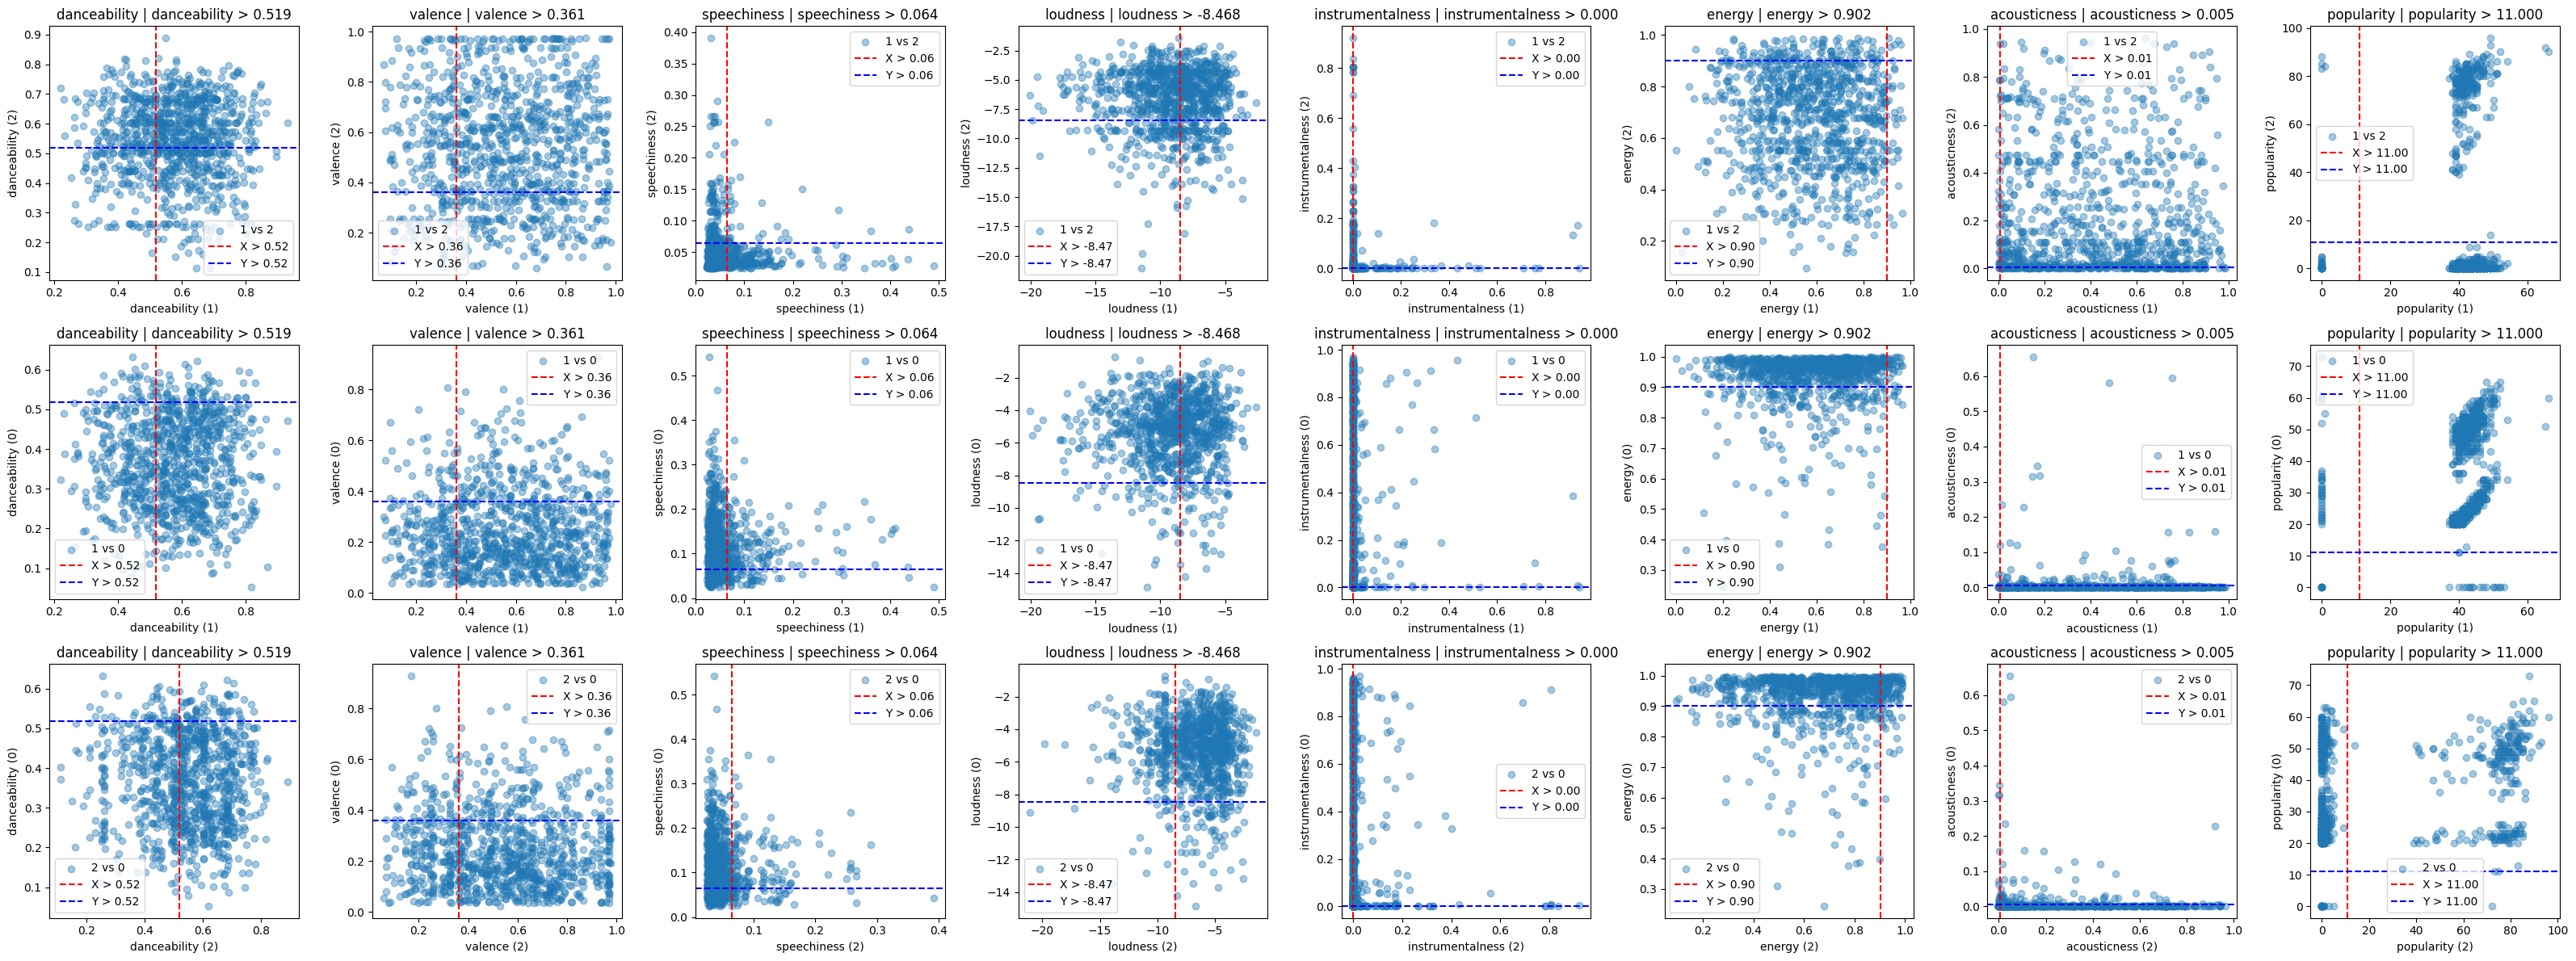

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from itertools import combinations
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import _tree

# Load and preprocess your data
# df = pd.read_csv("your_data.csv")
# features = ["danceability", "valence", "speechiness", "loudness", "instrumentalness", "energy", "acousticness", "popularity"]
# X = df[features]
# y = df["genre"]

# Train a single Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Helper function to get first decision rule for a feature
def get_first_rule_for_feature(rf, feature_name, feature_names):
    for estimator in rf.estimators_:
        tree = estimator.tree_
        for i in range(tree.node_count):
            if tree.feature[i] != _tree.TREE_UNDEFINED:
                split_feature = feature_names[tree.feature[i]]
                if split_feature == feature_name:
                    threshold = tree.threshold[i]
                    return f"{split_feature} > {threshold:.3f}"
    return "No rule found"

# Get all combinations of genres
genres = y.unique()
genre_pairs = list(combinations(genres, 2))

# Plot settings
fig, axs = plt.subplots(len(genre_pairs), len(features), figsize=(4 * len(features), 4 * len(genre_pairs)))
if len(genre_pairs) == 1:
    axs = np.expand_dims(axs, 0)

for row_idx, (g1, g2) in enumerate(genre_pairs):
    df1 = df[df["track_genre"] == g1]
    df2 = df[df["track_genre"] == g2]
    for col_idx, feat in enumerate(features):
        ax = axs[row_idx, col_idx]
        x_vals = df1[feat]
        y_vals = df2[feat]
        ax.scatter(x_vals, y_vals, alpha=0.4, label=f"{g1} vs {g2}")

        # Extract decision threshold
        rule = get_first_rule_for_feature(model, feat, features)
        if ">" in rule:
            try:
                threshold = float(rule.split(">")[1])
                # Draw vertical line (boundary for genre X)
                ax.axvline(threshold, color='red', linestyle='--', label=f'X > {threshold:.2f}')
                # Draw horizontal line (boundary for genre Y)
                ax.axhline(threshold, color='blue', linestyle='--', label=f'Y > {threshold:.2f}')
            except:
                pass

        ax.set_xlabel(f"{feat} ({g1})")
        ax.set_ylabel(f"{feat} ({g2})")
        ax.set_title(f"{feat} | {rule}")
        ax.legend()

plt.tight_layout()
plt.show()

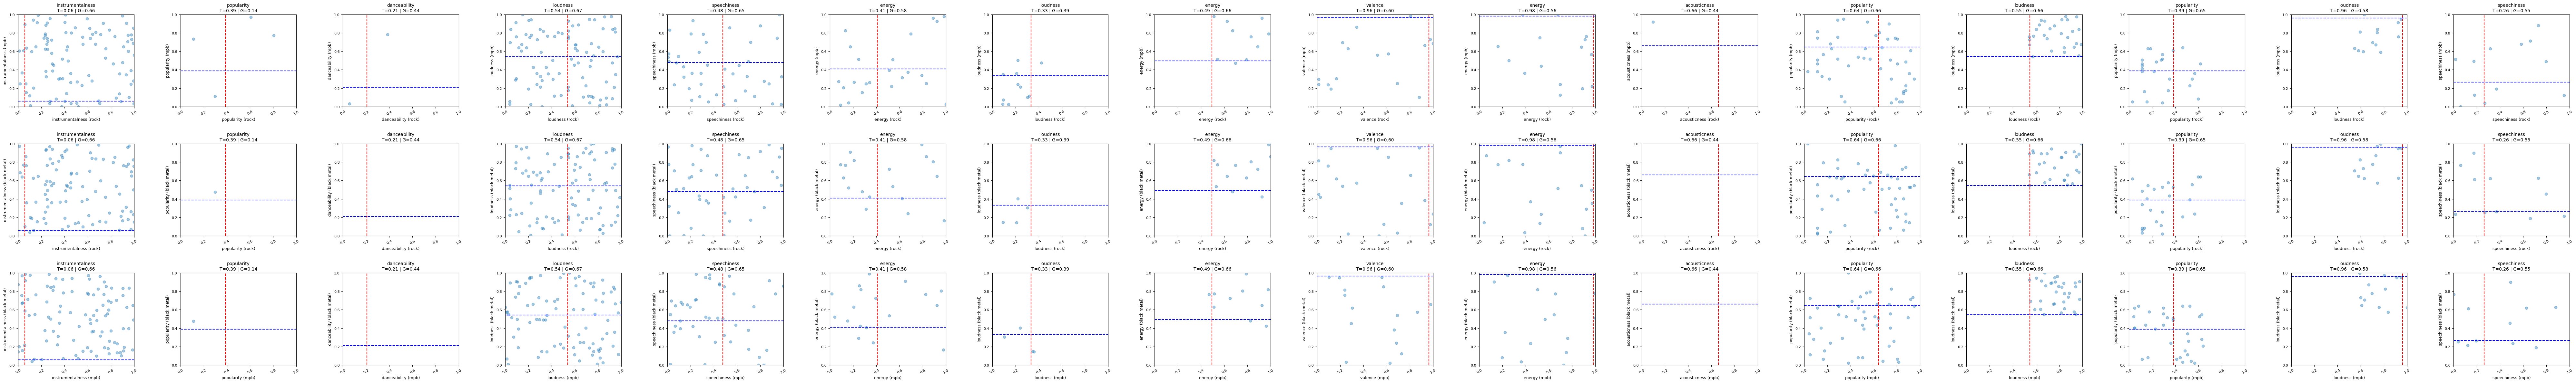

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import _tree
import numpy as np

np.random.seed(0)
genres = ['rock', 'mpb', 'black metal']
n_samples_per_genre = 100

def create_genre_data(genre_name):
    return pd.DataFrame({
        'danceability': np.random.rand(n_samples_per_genre),
        'valence': np.random.rand(n_samples_per_genre),
        'speechiness': np.random.rand(n_samples_per_genre),
        'loudness': np.random.rand(n_samples_per_genre) * -20,
        'instrumentalness': np.random.rand(n_samples_per_genre),
        'energy': np.random.rand(n_samples_per_genre),
        'acousticness': np.random.rand(n_samples_per_genre),
        'popularity': np.random.randint(0, 100, n_samples_per_genre),
        'track_genre': genre_name
    })

df = pd.concat([create_genre_data(g) for g in genres], ignore_index=True)

features = ['danceability', 'valence', 'speechiness', 'loudness',
            'instrumentalness', 'energy', 'acousticness', 'popularity']

X = df[features]

# Apply Min-Max scaling
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=features)

y = LabelEncoder().fit_transform(df['track_genre'])

model = RandomForestClassifier(n_estimators=1, max_depth=5, random_state=0)
model.fit(X_scaled, y)

def extract_rules(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    
    rules = []
    
    def recurse(node, depth, data_indices):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            gini = tree_.impurity[node]
            left = tree_.children_left[node]
            right = tree_.children_right[node]
            rules.append({
                "feature": name,
                "threshold": threshold,
                "gini": gini,
                "depth": depth,
                "node": node,
                "data_indices": data_indices
            })
            left_indices = data_indices[X_scaled.loc[data_indices, name] <= threshold]
            right_indices = data_indices[X_scaled.loc[data_indices, name] > threshold]
            recurse(left, depth + 1, left_indices)
            recurse(right, depth + 1, right_indices)
    
    recurse(0, 0, df.index)
    return rules

rules = extract_rules(model.estimators_[0], features)

n_rules = len(rules)
n_rows = len(genres) * (len(genres) - 1) // 2

# Increase figure size
fig, axs = plt.subplots(n_rows, n_rules, figsize=(5 * n_rules, 4 * n_rows))

genre_pairs = [(g1, g2) for i, g1 in enumerate(genres) for g2 in genres[i+1:]]

for row_idx, (g1, g2) in enumerate(genre_pairs):
    for col_idx, rule in enumerate(rules):
        feat = rule["feature"]
        threshold = rule["threshold"]
        gini = rule["gini"]
        node = rule["node"]

        ax = axs[row_idx, col_idx] if n_rows > 1 else axs[col_idx]
        
        node_indices = rule["data_indices"]
        node_df = df.loc[node_indices]

        indices_g1 = node_df[node_df["track_genre"] == g1].index
        indices_g2 = node_df[node_df["track_genre"] == g2].index

        x = X_scaled.loc[indices_g1, feat].values
        y = X_scaled.loc[indices_g2, feat].values

        max_len = max(len(x), len(y))
        if len(x) < max_len:
            x = np.pad(x, (0, max_len - len(x)), constant_values=np.nan)
        if len(y) < max_len:
            y = np.pad(y, (0, max_len - len(y)), constant_values=np.nan)

        ax.scatter(x, y, alpha=0.4)
        ax.axvline(threshold, color='red', linestyle='--')
        ax.axhline(threshold, color='blue', linestyle='--')
        ax.set_xlabel(f"{feat} ({g1})", fontsize=9)
        ax.set_ylabel(f"{feat} ({g2})", fontsize=9)
        ax.set_title(f"{feat}\nT={threshold:.2f} | G={gini:.2f}", fontsize=10)
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)

        # Rotate labels if overlapping
        for label in ax.get_xticklabels():
            label.set_rotation(30)
            label.set_fontsize(8)
        for label in ax.get_yticklabels():
            label.set_fontsize(8)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.4)  # adjust spacing between subplots
plt.show()



In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import _tree
import numpy as np

np.random.seed(0)
genres = ['rock', 'mpb', 'death-metal']
n_samples_per_genre = 100

def create_genre_data(genre_name):
    return pd.DataFrame({
        'danceability': np.random.rand(n_samples_per_genre),
        'valence': np.random.rand(n_samples_per_genre),
        'speechiness': np.random.rand(n_samples_per_genre),
        'loudness': np.random.rand(n_samples_per_genre) * -20,
        'instrumentalness': np.random.rand(n_samples_per_genre),
        'energy': np.random.rand(n_samples_per_genre),
        'acousticness': np.random.rand(n_samples_per_genre),
        'popularity': np.random.randint(0, 100, n_samples_per_genre),
        'track_genre': genre_name
    })

df = pd.concat([create_genre_data(g) for g in genres], ignore_index=True)

features = ['danceability', 'valence', 'speechiness', 'loudness',
            'instrumentalness', 'energy', 'acousticness', 'popularity']

X = df[features]

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=features)

y = LabelEncoder().fit_transform(df['track_genre'])

model = RandomForestClassifier(n_estimators=1, max_depth=5, random_state=0)
model.fit(X_scaled, y)

def extract_rules(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    
    rules = []
    def recurse(node, depth, data_indices):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            gini = tree_.impurity[node]
            left = tree_.children_left[node]
            right = tree_.children_right[node]
            rules.append({
                "feature": name,
                "threshold": threshold,
                "gini": gini,
                "depth": depth,
                "node": node,
                "data_indices": data_indices
            })
            left_indices = data_indices[X_scaled.loc[data_indices, name] <= threshold]
            right_indices = data_indices[X_scaled.loc[data_indices, name] > threshold]
            recurse(left, depth + 1, left_indices)
            recurse(right, depth + 1, right_indices)
    
    recurse(0, 0, df.index)
    return rules

rules = extract_rules(model.estimators_[0], features)

# Create one row of subplots: 1 column per rule
fig, axs = plt.subplots(1, len(rules), figsize=(5 * len(rules), 5))

if len(rules) == 1:
    axs = [axs]  # Make iterable if only one subplot

for i, rule in enumerate(rules):
    feat = rule["feature"]
    threshold = rule["threshold"]
    gini = rule["gini"]
    node_indices = rule["data_indices"]
    node_df = df.loc[node_indices]
    ax = axs[i]

    # Gather genre values for this node
    genre_values = {}
    for genre in genres:
        genre_vals = X_scaled.loc[node_df[node_df['track_genre'] == genre].index, feat].values
        genre_values[genre] = genre_vals

    # Equalize lengths using NaN padding
    max_len = max(len(v) for v in genre_values.values())
    padded_data = {
        genre: np.pad(v, (0, max_len - len(v)), constant_values=np.nan)
        for genre, v in genre_values.items()
    }

    # Use same data for X and Y to make 45° scatter line for each genre
    for genre, values in padded_data.items():
        ax.scatter(values, values, label=genre, alpha=0.6)

    ax.axvline(threshold, color='red', linestyle='--')
    ax.axhline(threshold, color='blue', linestyle='--')
    ax.set_title(f"{feat}\nT={threshold:.2f} | G={gini:.2f}")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel(feat)
    ax.set_ylabel(feat)
    ax.legend()

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

In [ ]:
rules

[{'feature': 'instrumentalness',
  'threshold': np.float64(0.05818222649395466),
  'gini': np.float64(0.6649777777777778),
  'depth': 0,
  'node': 0,
  'data_indices': RangeIndex(start=0, stop=300, step=1)},
 {'feature': 'popularity',
  'threshold': np.float64(0.3865979313850403),
  'gini': np.float64(0.14201183431952658),
  'depth': 1,
  'node': np.int64(1),
  'data_indices': Index([9, 10, 17, 43, 105, 134, 151, 153, 159, 162, 170, 176, 190, 195, 202], dtype='int64')},
 {'feature': 'danceability',
  'threshold': np.float64(0.20906943455338478),
  'gini': np.float64(0.4444444444444444),
  'depth': 2,
  'node': np.int64(2),
  'data_indices': Index([9, 43, 105, 195], dtype='int64')},
 {'feature': 'loudness',
  'threshold': np.float64(0.5399770140647888),
  'gini': np.float64(0.6665128871298669),
  'depth': 1,
  'node': np.int64(6),
  'data_indices': Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,  11,
         ...
         290, 291, 292, 293, 294, 295, 296, 297, 298, 299],
        dt

In [58]:


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import _tree
import numpy as np

# Set seed and genres
np.random.seed(0)
genres = ['rock', 'mpb', 'death-metal']
n_samples_per_genre = 100

# Generate mock data
def create_genre_data(genre_name):
    return pd.DataFrame({
        'danceability': np.random.rand(n_samples_per_genre),
        'valence': np.random.rand(n_samples_per_genre),
        'speechiness': np.random.rand(n_samples_per_genre),
        'loudness': np.random.rand(n_samples_per_genre) * -20,
        'instrumentalness': np.random.rand(n_samples_per_genre),
        'energy': np.random.rand(n_samples_per_genre),
        'acousticness': np.random.rand(n_samples_per_genre),
        'popularity': np.random.randint(0, 100, n_samples_per_genre),
        'track_genre': genre_name
    })

df = pd.concat([create_genre_data(g) for g in genres], ignore_index=True)

# Feature preparation
features = ['danceability', 'valence', 'speechiness', 'loudness',
            'instrumentalness', 'energy', 'acousticness', 'popularity']
X = df[features]
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=features)
y = LabelEncoder().fit_transform(df['track_genre'])

# Train model
model = RandomForestClassifier(n_estimators=1, max_depth=5, random_state=0)
model.fit(X_scaled, y)

# Extract tree rules
def extract_rules(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    
    # return feature_name
    rules = []
    def recurse(node, depth, data_indices):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            gini = tree_.impurity[node]
            left = tree_.children_left[node]
            right = tree_.children_right[node]
            rules.append({
                "feature": name,
                "threshold": threshold,
                "gini": gini,
                "depth": depth,
                "node": node,
                "data_indices": data_indices
            })
            left_indices = data_indices[X_scaled.loc[data_indices, name] <= threshold]
            right_indices = data_indices[X_scaled.loc[data_indices, name] > threshold]
            recurse(left, depth + 1, left_indices)
            recurse(right, depth + 1, right_indices)
    
    recurse(0, 0, df.index)
    return rules

rules = extract_rules(model.estimators_[0], features)

# Generate a plot for each node split
# figs = []
# for rule in rules:
#     feature = rule['feature']
#     threshold = rule['threshold']
#     data_idx = rule['data_indices']
    
#     fig, ax = plt.subplots()
    
#     for label in np.unique(y):
#         ax.hist(X_scaled.iloc[data_idx][feature][y[data_idx] == label], bins=20, alpha=0.5, label=f'Class {label}')
#     ax.axvline(threshold, color='red', linestyle='--', label='Threshold')
#     ax.set_title(f"Node {rule['node']} - {feature} <= {threshold:.2f}")
#     ax.set_xlabel(feature)
#     ax.set_ylabel("Count")
#     ax.legend()
#     figs.append(fig)
    
  
rules

[{'feature': 'instrumentalness',
  'threshold': np.float64(0.05818222649395466),
  'gini': np.float64(0.6649777777777778),
  'depth': 0,
  'node': 0,
  'data_indices': RangeIndex(start=0, stop=300, step=1)},
 {'feature': 'popularity',
  'threshold': np.float64(0.3865979313850403),
  'gini': np.float64(0.14201183431952658),
  'depth': 1,
  'node': np.int64(1),
  'data_indices': Index([9, 10, 17, 43, 105, 134, 151, 153, 159, 162, 170, 176, 190, 195, 202], dtype='int64')},
 {'feature': 'danceability',
  'threshold': np.float64(0.20906943455338478),
  'gini': np.float64(0.4444444444444444),
  'depth': 2,
  'node': np.int64(2),
  'data_indices': Index([9, 43, 105, 195], dtype='int64')},
 {'feature': 'loudness',
  'threshold': np.float64(0.5399770140647888),
  'gini': np.float64(0.6665128871298669),
  'depth': 1,
  'node': np.int64(6),
  'data_indices': Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,  11,
         ...
         290, 291, 292, 293, 294, 295, 296, 297, 298, 299],
        dt

In [67]:
import numpy as np
for tree in model.estimators_:
    leaf_indices = tree.apply(X)
    print(leaf_indices)
    print(np.unique(leaf_indices).size)

[10 17 14 14 10 14 17 10 17  5  5 10 17 14 14 17 10  5 17 17 17 17 10 17
 10 17 17 14 17 17 10 10 17 10 10 10 14 14 14 17 17 14 17  5 17 10 17 14
 14 20 14 17 17 17 17 10 17 17 17 14 14 10 14 17 20 17 14 17 14 17 17 17
 10 17 14 17 17 17 17 17 10 17 17 10 14 10 17 17 17 17 14 14 17 14 17 14
 10 17 17 17 17 10 18 17 18  5 17 17 10 10 17 14 17 10 10 17 14 10 17 21
 17 10 10 17 17 17 10 17 10 10 13 10 10 17  5 14 10 14 17 17 17 17 14 17
 17 17 14 10 14 14 10  5 17  5 10 17 10 17 20  5 17 17  5 14 14 17 17 17
 14 10  5 14 10 17 14 10  5 17 14 17 14 17 10 10 13 14 14 17 14 10  5 14
 20 14 17  5 13 17 10 17 17 17  5 10 17 17 10 14 17 10 14 14 14 13 13 17
 14 17 10 17 17 14 14 10 17 14 17 17 10 14 10 17 17 14 17 14 17 13 17 17
 10 10 14 10 17 10 17 17 14 17 17 14 17 14 10 10 10 17 14 17 17 17 14 17
 17 17 17 17 14 17 17 17 17 13 17 17 17 14 17 14 17 14 17 17 17 17 17 17
 10 17 17 17 14 17 17 17 17 10 17 14]
8


/Users/carolbarroco/Documents/RecomendSisKNN/NewVenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [39]:
rules


[{'feature': 'instrumentalness',
  'threshold': np.float64(0.05818222649395466),
  'gini': np.float64(0.6649777777777778),
  'depth': 0,
  'node': 0,
  'data_indices': RangeIndex(start=0, stop=300, step=1)},
 {'feature': 'popularity',
  'threshold': np.float64(0.3865979313850403),
  'gini': np.float64(0.14201183431952658),
  'depth': 1,
  'node': np.int64(1),
  'data_indices': Index([9, 10, 17, 43, 105, 134, 151, 153, 159, 162, 170, 176, 190, 195, 202], dtype='int64')},
 {'feature': 'danceability',
  'threshold': np.float64(0.20906943455338478),
  'gini': np.float64(0.4444444444444444),
  'depth': 2,
  'node': np.int64(2),
  'data_indices': Index([9, 43, 105, 195], dtype='int64')},
 {'feature': 'loudness',
  'threshold': np.float64(0.5399770140647888),
  'gini': np.float64(0.6665128871298669),
  'depth': 1,
  'node': np.int64(6),
  'data_indices': Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,  11,
         ...
         290, 291, 292, 293, 294, 295, 296, 297, 298, 299],
        dt